<a href="https://colab.research.google.com/github/ellabam/learning-java/blob/master/Copy_of_DATA_691_Spring_2022_Flower_Classification_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/mgreenbe/flower-classification.git
! rm -rf flower-classification/.git

Cloning into 'flower-classification'...
remote: Enumerating objects: 4329, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 4329 (delta 0), reused 1 (delta 0), pack-reused 4328
Receiving objects: 100% (4329/4329), 224.05 MiB | 23.75 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Rescaling, RandomFlip, RandomContrast, RandomRotation
from tensorflow.keras.applications import MobileNetV2

In [ ]:
flower_path = Path("flower-classification")
flower_types = [d.name for d in flower_path.iterdir()]
flower_types

['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']

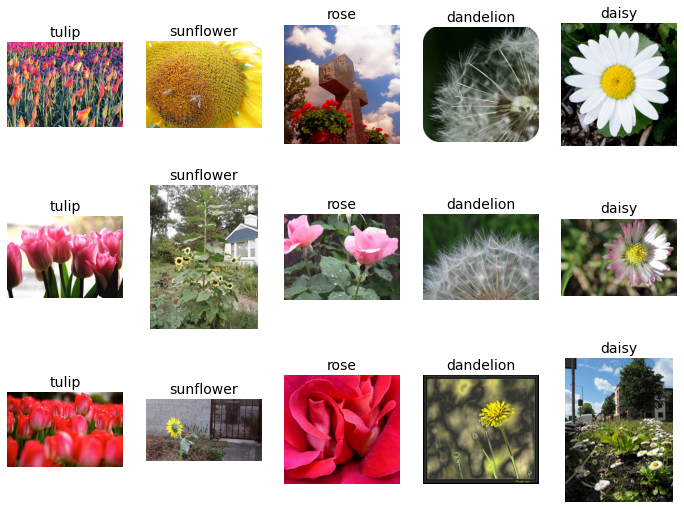

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(12, 9))
for j, flower_type in enumerate(flower_types):
  flowers = (flower_path/flower_type).iterdir()
  for i in range(3):
    ax = axes[i, j]
    ax.set_title(flower_type, fontsize=14)
    ax.set_axis_off()
    im = Image.open(next(flowers))
    ax.imshow(im)

In [ ]:
height = 224
width = 224
batch_size = 50

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flower_path,
    validation_split=0.2,
    subset="training",
    seed=666,
    image_size=(height, width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flower_path,
    validation_split=0.2,
    subset="validation",
    seed=666,
    image_size=(height, width),
    batch_size=batch_size
)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.
Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
x, y = next(iter(train_ds))
print(x.shape, y.shape)

(50, 224, 224, 3) (50,)


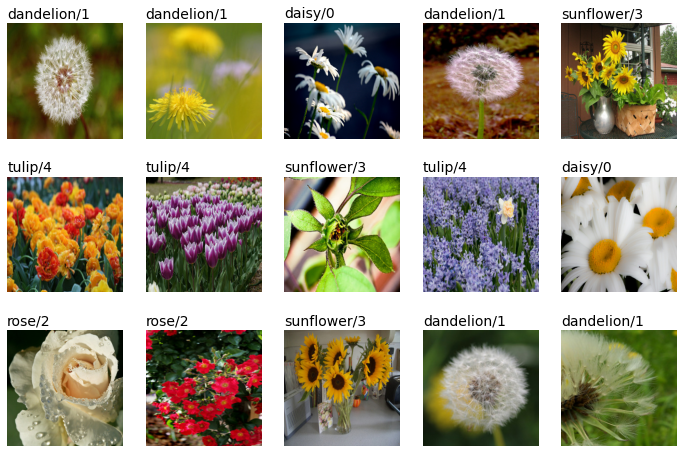

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.ravel()):
    ax.set_axis_off()
    ax.imshow(x[i]/255)
    ax.set_title(f"{class_names[y[i]]}/{y[i]}", fontsize=14, loc="left")
    ax.set_axis_off()

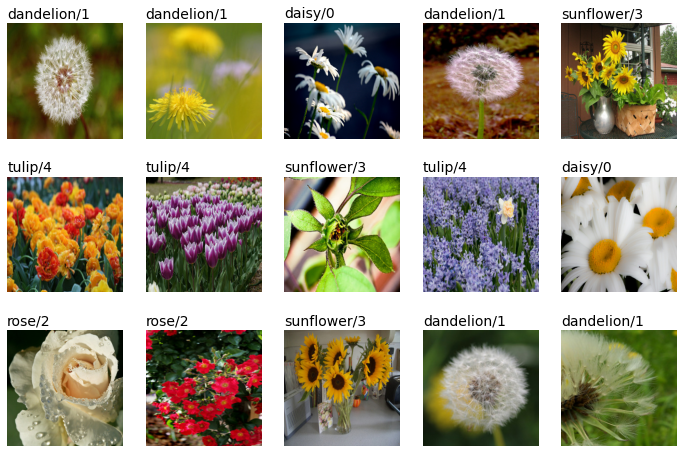

In [ ]:
R = RandomRotation((0.3, 0.4))
x = R(x)

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.ravel()):
    ax.set_axis_off()
    ax.imshow(x[i]/255)
    ax.set_title(f"{class_names[y[i]]}/{y[i]}", fontsize=14, loc="left")
    ax.set_axis_off()

In [ ]:
model = Sequential([
  Input((height, width, 3)),
  Rescaling(1/255),
  Conv2D(32, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(64, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(128, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(256, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(512, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Flatten(),
  Dense(5, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
70/70 [==============================] - 545s 8s/step - loss: 1.5559 - accuracy: 0.3090 - val_loss: 1.3832 - val_accuracy: 0.4051
Epoch 2/20
70/70 [==============================] - 528s 8s/step - loss: 1.3104 - accuracy: 0.4270 - val_loss: 1.2846 - val_accuracy: 0.4259
Epoch 3/20
70/70 [==============================] - 505s 7s/step - loss: 1.1686 - accuracy: 0.4990 - val_loss: 1.1875 - val_accuracy: 0.4745
Epoch 4/20
70/70 [==============================] - 497s 7s/step - loss: 1.0764 - accuracy: 0.5580 - val_loss: 1.0940 - val_accuracy: 0.5602
Epoch 5/20
70/70 [==============================] - 511s 7s/step - loss: 0.9585 - accuracy: 0.6331 - val_loss: 0.9725 - val_accuracy: 0.6088
Epoch 6/20
70/70 [==============================] - 501s 7s/step - loss: 0.8668 - accuracy: 0.6646 - val_loss: 1.0016 - val_accuracy: 0.6053
Epoch 7/20
70/70 [==============================] - 507s 7s/step - loss: 0.8261 - accuracy: 0.6811 - val_loss: 0.9156 - val_accuracy: 0.6377
Epoch 8/20
70

In [ ]:
model = Sequential([
  Input((height, width, 3)),
  Rescaling(1/255),
  RandomFlip("horizontal"),
  RandomContrast(0.1),
  RandomRotation((-0.1, 0.1)),
  Conv2D(32, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(64, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(128, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(256, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Conv2D(512, 3, activation="relu"),
  MaxPooling2D(),
  Dropout(0.3),
  Flatten(),
  Dense(5, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 3)      0         
 rast)                                                           
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)    

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
70/70 [==============================] - 6s 68ms/step - loss: 1.5269 - accuracy: 0.2949 - val_loss: 1.3495 - val_accuracy: 0.4132
Epoch 2/20
70/70 [==============================] - 5s 66ms/step - loss: 1.2407 - accuracy: 0.4695 - val_loss: 1.2406 - val_accuracy: 0.5301
Epoch 3/20
70/70 [==============================] - 5s 66ms/step - loss: 1.1142 - accuracy: 0.5516 - val_loss: 1.2319 - val_accuracy: 0.5035
Epoch 4/20
70/70 [==============================] - 5s 66ms/step - loss: 1.0481 - accuracy: 0.5750 - val_loss: 1.0675 - val_accuracy: 0.5660
Epoch 5/20
70/70 [==============================] - 5s 66ms/step - loss: 0.9752 - accuracy: 0.6123 - val_loss: 1.0100 - val_accuracy: 0.5845
Epoch 6/20
70/70 [==============================] - 5s 66ms/step - loss: 0.9361 - accuracy: 0.6378 - val_loss: 1.0093 - val_accuracy: 0.6030
Epoch 7/20
70/70 [==============================] - 5s 66ms/step - loss: 0.8694 - accuracy: 0.6649 - val_loss: 0.9031 - val_accuracy: 0.6447
Epoch 8/20
70

In [ ]:
feature_extractor = MobileNetV2(include_top=False, input_shape=(height, width, 3), weights="imagenet")

In [ ]:
feature_extractor.trainable = False
feature_extractor.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
model = Sequential([
  Input((height, width, 3)),
  Rescaling(1/255),
  RandomFlip("horizontal"),
  RandomContrast(0.1),
  feature_extractor,
  Dropout(0.3),
  Flatten(),
  Dense(5, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast_1 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 1280)        0         
                                                                 
 flatten_2 (Flatten)         (None, 62720)            

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
70/70 [==============================] - 8s 67ms/step - loss: 2.0708 - accuracy: 0.7693 - val_loss: 1.6304 - val_accuracy: 0.8264
Epoch 2/20
70/70 [==============================] - 4s 55ms/step - loss: 0.8988 - accuracy: 0.8893 - val_loss: 1.6472 - val_accuracy: 0.8391
Epoch 3/20
70/70 [==============================] - 4s 55ms/step - loss: 0.4423 - accuracy: 0.9416 - val_loss: 2.2687 - val_accuracy: 0.8194
Epoch 4/20
70/70 [==============================] - 4s 55ms/step - loss: 0.3639 - accuracy: 0.9454 - val_loss: 1.6674 - val_accuracy: 0.8576
Epoch 5/20
70/70 [==============================] - 4s 55ms/step - loss: 0.3205 - accuracy: 0.9592 - val_loss: 1.8008 - val_accuracy: 0.8530
Epoch 6/20
70/70 [==============================] - 4s 55ms/step - loss: 0.1891 - accuracy: 0.9708 - val_loss: 2.1066 - val_accuracy: 0.8426
Epoch 7/20
70/70 [==============================] - 4s 55ms/step - loss: 0.2415 - accuracy: 0.9714 - val_loss: 2.4166 - val_accuracy: 0.8495
Epoch 8/20
70